In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import time
from IPython.display import clear_output

In [21]:
lamb0 = 0.520  # microns wavelength
theta1 = 30    # degrees
n1 = 1         # first media refracting index
n2 = 1.5       # second media refracting index
k2 = 0         # second media extintion index

In [22]:
c = 1  # vacum velocity 1 micron per time step
k0 = 2 * np.pi / lamb0  # vacum wavenumber in microns^-1
sin_theta1 = np.sin(np.radians(theta1)) 
cos_theta1 = np.cos(np.radians(theta1)) 
omega = c*k0  # w = ck

n2_hat = n2 - 1j*k2  # complex refractive index
sin_theta2_hat = n1 * sin_theta1 / n2_hat
theta2_hat = np.arcsin(sin_theta2_hat)
cos_theta2_hat = np.cos(theta2_hat)

a = np.real(n2_hat*cos_theta2_hat)
b = -np.imag(n2_hat*cos_theta2_hat)
print(a, b)

1.414213562373095 -0.0


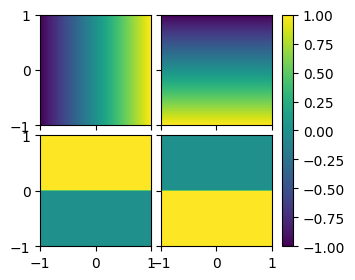

In [23]:
N_points = 300
overlap = 0.01
rang = np.linspace(-1, 1, N_points)
x, z = np.meshgrid(rang, rang)

inc_mask = (x<overlap)
refl_mask = (x>-overlap)
med1_mask = z<0
med2_mask = z>0

fig = plt.figure(figsize=(15,15))
axs = ImageGrid(fig, 142,  # similar to fig.add_subplot(142).
                 nrows_ncols=(2, 2), axes_pad=0.1, label_mode="L", share_all=True,
                 cbar_location="right", cbar_mode="single")
im = axs[0].imshow(x, vmin=-1, vmax=1, extent=[-1,1,-1,1])
axs[1].imshow(z, vmin=-1, vmax=1, extent=[-1,1,-1,1])
axs[2].imshow(med1_mask, vmin=-1, vmax=1, extent=[-1,1,-1,1])
axs[3].imshow(med2_mask, vmin=-1, vmax=1, extent=[-1,1,-1,1])
axs.cbar_axes[0].colorbar(im)

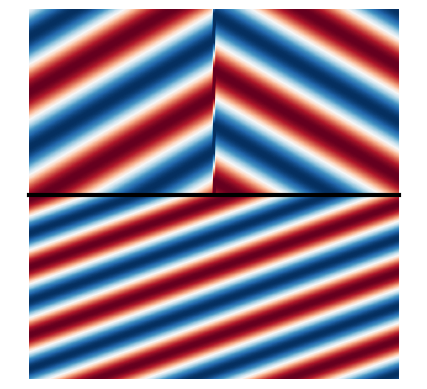

In [24]:
Amp_inc = np.ones((2))[:,None,None]
prop_inc = np.exp(-1j*k0*(x*n1*sin_theta1+z*n1*cos_theta1))[None, :, :]

Amp_trans = np.ones((2))[:,None,None]
atte_trans = np.exp(-k0*b*z)[None, :, :]
prop_trans = np.exp(-1j*k0*(x*n1*sin_theta1+z*a))[None, :, :]

Amp_refl = np.ones((2))[:,None,None]
prop_refl = np.exp(-1j*k0*(x*n1*sin_theta1-z*n1*cos_theta1))[None, :, :]

Delta_t = 100
plt.figure()
for t in range(Delta_t):
    clear_output(wait=True)
    osci_term = np.exp(-1j*omega*t)
    
    E_inc = Amp_inc * prop_inc * osci_term * med1_mask *  inc_mask
    E_trans = Amp_trans * atte_trans * prop_trans * osci_term * med2_mask
    E_refl = Amp_refl * prop_refl * osci_term * med1_mask * refl_mask
    
    E_tot = E_inc + E_trans + E_refl
    
    plt.imshow(np.real(E_tot[0,:,:]), vmin=-1, vmax=1, cmap='RdBu')
    plt.plot([-1, N_points], [N_points/2, N_points/2], '-k', linewidth=3)
    plt.axis('off')
    plt.show()